# 1kGenome Phase 1

Inès Krissaane

08/06/2018

In [18]:
# password : new password for the conference  = avillach-dbmi
from IPython.lib import passwd
passwd()

Enter password: ········
Verify password: ········
Passwords do not match.
Enter password: ········
Verify password: ········


'sha1:40c64ad64147:f4d6442cc6f9f8206aa40ce8fcb88d0a31f923dd'

In [1]:
import hail as hl
import hail.expr.aggregators as agg
hl.init()

Running on Apache Spark version 2.2.1
SparkUI available at http://10.142.0.12:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version devel-aa83f2a1d041
NOTE: This is a beta version. Interfaces may change
  during the beta period. We recommend pulling
  the latest changes weekly.


In [5]:
import gcsfs
fs = gcsfs.GCSFileSystem(project='avl-hail-ines')

No module named 'dask'


In [6]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter
import scipy.stats as stat
#import sklearn
from pprint import pprint
%matplotlib inline
from bokeh.plotting import figure, output_file, show
import time
from bokeh.io import output_notebook, push_notebook, show
import seaborn as sns
import plotly
import time
import gcsfs
import csv

## Load the data

#### Import VCF

#### Write VDS

#### Read VDS 

Begin by reading the fast VDS rather than the slow VCF.

In [4]:
#less than 1 seconde
start = time.time()
vds = hl.read_matrix_table("gs://1k-genome/1000-genomes/VDS-of-all/ALL.chr.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.mt")
elapsed_time = (time.time() - start)

## Getting to know our data 


#### Describe the data

In [17]:
vds.count()

NameError: name 'vds' is not defined

We have 39706715 variants and 1092 samples. 

In [ ]:
vds.count_cols()

In [ ]:
vds.count_rows()

In [ ]:
vds.describe()

In [ ]:
list(vds.row)

In [ ]:
# see the variants
vds.rows().select().show(5)
vds.rows().show(1)

In [ ]:
# see the samples
vds.s.show(5)

In [ ]:
list(vds.entry)

In [ ]:
# see the genotypes 
vds.entry.take(3)

In [ ]:
vds.entry.show(3)

#### Adding column fields

Super Population will be the phentoype.

In [7]:
#import all the sample informations
with fs.open('1k-genome/1000-genomes/other/sample_info/sample_info.csv',"rt") as f:
    data = pd.read_csv(f)

In [3]:
data.shape

(3500, 62)

In [9]:
data.head()

,Sample,Family_ID,Population,Population_Description,Gender,Relationship,Unexpected_Parent_Child,Non_Paternity,Siblings,Grandparents,...,In_Final_Phase_Variant_Calling,Has_Omni_Genotypes,Has_Axiom_Genotypes,Has_Affy_6_0_Genotypes,Has_Exome_LOF_Genotypes,EBV_Coverage,DNA_Source_from_Coriell,Has_Sequence_from_Blood_in_Index,Super_Population,Super_Population_Description
0,HG00096,HG00096,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,20.31,NaN,NaN,EUR,European
1,HG00097,HG00097,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,169.49,NaN,NaN,EUR,European
2,HG00098,HG00098,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,EUR,European
3,HG00099,HG00099,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,23.04,NaN,NaN,EUR,European
4,HG00100,HG00100,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,116.22,NaN,NaN,EUR,European


In [6]:
# Annotate the VDS
vds = vds.annotate_cols(**table[vds.s])

In [ ]:
print(vds.col.dtype)

In [ ]:
pprint(table.aggregate(agg.counter(table.Super_Population)))

  - SAS = South Asian
  - AMR = Americas
  - EUR = European
  - AFR = African
  - EAS = East Asian

## Subset the matrix

#### Table with less samples 

In [ ]:
indices = list(range(vds.count_cols()))
import random
random.shuffle(indices)
len(indices)

In [ ]:
vds_sample = vds.choose_cols(indices[1:10])
vds_sample.count()

#### Table with less snps

In [ ]:
vds_snp = vds.head(10000)
vds_snp.count()

#### Tableau with less sample and less snps

In [ ]:
vds_reduit = vds.head(18000).choose_cols(indices[1:51])
vds_reduit.count()

In [ ]:
vds_reduit.s.show(5)

In [ ]:
vds_reduit.rows().show(3)

In [ ]:
vds_reduit.cols().show(3)

In [ ]:
vds_reduit.GT.show (3)

In [ ]:
vds_reduit.GT.describe()

In [ ]:
type(vds_reduit.GT)

In [ ]:
# 10 min
# number of snps
snp_counts = vds.aggregate_rows(agg.counter(hl.Struct(ref=vds.alleles[0], alt=vds.alleles[1])))
counts = Counter(snp_counts)
counts.most_common(10)

# SNPs

Filter to take only SNPs variants. 

In [ ]:
gt = vds.GT

In [ ]:
gt.show(2)

METTRE UNE FONCTION AGGREGATE TO SEE THE SNPS ?

# PCA

This method does not automatically mean-center or normalize each column. If desired, such transformations should be incorporated in entry_expr.

ADD a description of what the fonction do

In [7]:
eigenvalues, scores, loadings = hl.hwe_normalized_pca(vds.GT, k=3)

2018-06-21 19:02:18 Hail: INFO: hwe_normalized_pca: running PCA using 39360337 variants.
2018-06-21 19:06:55 Hail: INFO: pca: running PCA with 5 components...


In [56]:
# result of PCA phase 1
with fs.open('python-ines/result_PCA_phase1.csv') as f:
     result_pca = pd.read_csv(f)

In [57]:
result_pca.shape

(1092, 2)

STUPID IF the fichier est annoté !!! regarder tuto 

In [58]:
# Merge the result of the PCA and the data about sample
tab_merge = pd.merge(data,result_pca, left_on = 'Sample', right_on = 's')
tab_merge['scores'] = tab_merge['scores'].apply(eval)

In [59]:
tab_merge.head()

,Sample,Family_ID,Population,Population_Description,Gender,Relationship,Unexpected_Parent_Child,Non_Paternity,Siblings,Grandparents,...,Has_Axiom_Genotypes,Has_Affy_6_0_Genotypes,Has_Exome_LOF_Genotypes,EBV_Coverage,DNA_Source_from_Coriell,Has_Sequence_from_Blood_in_Index,Super_Population,Super_Population_Description,s,scores
0,HG00096,HG00096,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,20.31,NaN,NaN,EUR,European,HG00096,"[0.0977252410965315, -0.12383210336741407, -0...."
1,HG00097,HG00097,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,169.49,NaN,NaN,EUR,European,HG00097,"[0.09454981957527189, -0.12693189906408944, -0..."
2,HG00099,HG00099,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,23.04,NaN,NaN,EUR,European,HG00099,"[0.09459784057306989, -0.12808712289968635, -0..."
3,HG00100,HG00100,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,116.22,NaN,NaN,EUR,European,HG00100,"[0.09704741895992026, -0.12903023760772991, -0..."
4,HG00101,HG00101,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,82.00,NaN,NaN,EUR,European,HG00101,"[0.09395472296986376, -0.12172016366169666, -0..."


#### With Plotly

In [77]:
def phenotype(table, phenotype,name, dimension =2):
    list1 = []
    list2 = []
    for i in (table[table[phenotype]==name].index):
            list1.append(table.scores[i][0:dimension][0])
            list2.append(table.scores[i][0:dimension][1])
    return([list1, list2])

In [83]:
trace1 = Scatter(
            x=phenotype(table, 'Super_Population', 'EUR')[0],
            y=phenotype(table, 'Super_Population', 'EUR')[1],
            mode='markers',
            name='EUR',
            marker= Marker(
                size=12,
                line= Line(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8))
        
trace2 = Scatter(
            x=phenotype(table, 'Super_Population', 'AFR')[0],
            y=phenotype(table, 'Super_Population', 'AFR')[1],
            mode='markers',
            name='AFR',
            marker= Marker(
                size=12,
                line= Line(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8))

trace3 = Scatter(
            x=phenotype(table, 'Super_Population', 'AMR')[0],
            y=phenotype(table, 'Super_Population', 'AMR')[1],
            mode='markers',
            name='AMR',
            marker= Marker(
                size=12,
                line= Line(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8))

trace4 = Scatter(
            x=phenotype(table, 'Super_Population', 'EAS')[0],
            y=phenotype(table, 'Super_Population', 'EAS')[1],
            mode='markers',
            name='EAS',
            marker= Marker(
                size=12,
                line= Line(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8))

data = Data([trace1, trace2, trace3, trace4])
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [84]:
def phenotype(table, phenotype,name, dimension =3):
    list1 = []
    list2 = []
    list3 = []
    for i in (table[table[phenotype]==name].index):
            list1.append(table.scores[i][0:dimension][0])
            list2.append(table.scores[i][0:dimension][1])
            list3.append(table.scores[i][0:dimension][2])
    return([list1, list2, list3])

In [99]:
trace1 = Scatter3d(
            x=phenotype(table, 'Super_Population', 'EUR')[0],
            y=phenotype(table, 'Super_Population', 'EUR')[1],
            z=phenotype(table, 'Super_Population', 'EUR')[2],
            mode='markers',
            name='EUR',
            marker= Marker(
                size=5))
        
trace2 = Scatter3d(
            x=phenotype(table, 'Super_Population', 'AFR')[0],
            y=phenotype(table, 'Super_Population', 'AFR')[1],
            z=phenotype(table, 'Super_Population', 'AFR')[2],
            mode='markers',
            name='AFR',
            marker= Marker(
                size=5
             ))

trace3 = Scatter3d(
            x=phenotype(table, 'Super_Population', 'AMR')[0],
            y=phenotype(table, 'Super_Population', 'AMR')[1],
            z=phenotype(table, 'Super_Population', 'AMR')[2],
            mode='markers',
            name='AMR',
            marker= Marker(
                size=5
                ))

trace4 = Scatter3d(
            x=phenotype(table, 'Super_Population', 'EAS')[0],
            y=phenotype(table, 'Super_Population', 'EAS')[1],
            z=phenotype(table, 'Super_Population', 'EAS')[2],
            mode='markers',
            name='EAS',
            marker= Marker(
                size=5
                ))

data = Data([trace1, trace2, trace3, trace4])


layout = go.Layout(title='Phase 1 - 1000 Genomes Project',
                    scene = dict(
                    xaxis = dict(
                        title='PCA 1'),
                    yaxis = dict(
                        title='PCA 2'),
                    zaxis = dict(
                        title='PCA 3'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )

fig = Figure(data=data, layout=layout)
py.iplot(fig)


#### With Matlplotlib

In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
info = pd.read_csv('sample_info.csv', sep=',')
result_pca = pd.read_csv('result_PCA_phase1.csv', sep=',')

In [8]:
tab_merge = pd.merge(info,result_pca, left_on = 'Sample', right_on = 's')
tab_merge['scores'] = tab_merge['scores'].apply(eval)

In [15]:
from itertools import cycle
cycol = cycle('bgrcmk')

def scatter(table, phenotype='Super_Population', dimension=2):
    """Scatter the result of a PCA with two components.
    Input:
    - table: pd.DataFrame with n rows (ie the number of points/samples)
    - phenotype : phenotype present in the table
    - dimension : number of dimension for the PCA (2 or 3)
    """
    for pop in (table[phenotype].unique()): 
        PCA1 = []
        PCA2 = []
        for i in (table[table[phenotype]==pop].index):
            PCA1.append(table.scores[i][0:dimension][0])
            PCA2.append(table.scores[i][0:dimension][1])
        plt.scatter(PCA1,PCA2, label=pop, color = next(cycol))
    plt.legend();

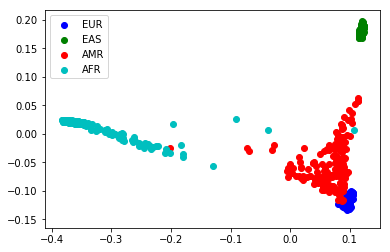

In [16]:
scatter(tab_merge)

In [ ]:
def scatter(table, phenotype='Super_Population', dimension=2):
    """Scatter the result of a PCA.
    Input:
    - table: pd.DataFrame with n rows (ie the number of points/samples)
    - phenotype : phenotype present in the table
    - dimension : number of dimension for the PCA (2 or 3)
    """
    for pop in (table[phenotype].unique()): 
        PCA1 = []
        PCA2 = []
        PCA3 = []
        for i in (table[table[phenotype]==pop].index):
            PCA1.append(table.scores[i][0:dimension][0])
            PCA2.append(table.scores[i][0:dimension][1])
            PCA3.append(table.scores[i][0:dimension][2])
            if (dimension == 2):
                plt.scatter(PCA1,PCA2, label=pop, color = next(cycol))
            else :
                #SCATTER EN 3D 
    plt.legend();